# Lab03: Logistic Regression.

- Student ID: 21127112
- Student name: Triệu Nhật Minh

**How to do your homework**


You will work directly on this notebook; the word TODO indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (Kernel -> Restart & Run All).

Then create a folder named ID (for example, if your ID is 1234567, then name the folder 1234567). Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Logistic Regression.

## 1. Feature Extraction

### Import Library

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Load data

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto') # Remove FutureWarning

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Extract Features

So we basically have 70000 samples with each sample having 784 features - pixels in this case and a label - the digit the image represent.

Let’s play around and see if we can extract any features from the pixels that can be more informative. First I’d like to know more about average intensity - that is the average value of a pixel in an image for the different digits

In [4]:
labels=np.unique(y)
# print(labels)
n_label=np.unique(y).shape[0]
l_means=np.zeros(shape=n_label,dtype=float) #array stores average intensity for each label

#TODO compute average intensity for each label
# the average value of a pixel in an image for the different digits

l_means = [np.mean(X[y == label]) for label in labels]

print(l_means)

[44.17740512110972, 19.40680177110834, 38.03420776035736, 36.15420938015313, 30.995999825047253, 32.95015872656682, 35.23486491018746, 29.217987369773084, 38.39790124841145, 31.359408088472527]


Plot the average intensity using matplotlib

<BarContainer object of 10 artists>

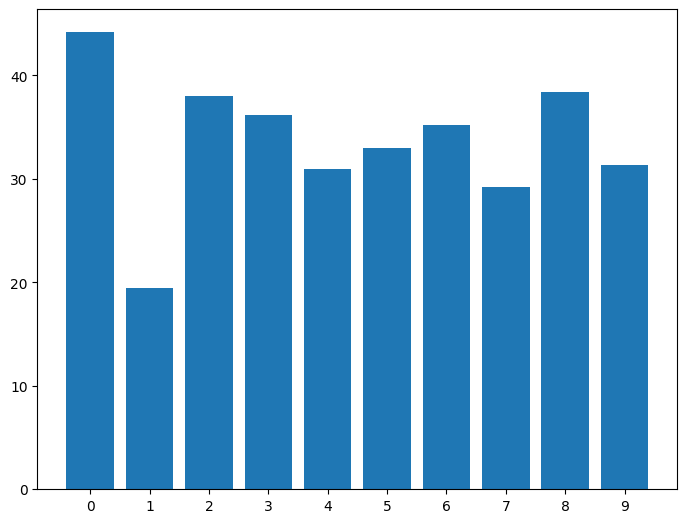

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,l_means)

As we can see there are some differences in intensity. The digit “1” is the less intense while the digit “0” is the most intense. So this new feature seems to have some predictive value if you wanted to know if say your digit is a “1” or not.

In [6]:
#TODO compute average intensity for each data sample
intensity = X.sum(axis=1) / X.shape[1]
print(intensity)
print(intensity.shape)

0        35.108418
1        39.661990
2        24.799745
3        21.855867
4        29.609694
           ...    
69995    49.455357
69996    43.897959
69997    37.284439
69998    33.876276
69999    53.358418
Length: 70000, dtype: float64
(70000,)


Sometimes people really do not know what are they doing. I am not an exception:

In [7]:
X_flip = X.iloc[:, ::-1]
symmetry = np.mean((X - X_flip), axis=1)
print(symmetry.shape)

(70000,)


I called this feature "symmetry" (though it's not "symmetry" at all). Use visualization method to understand why this feature work.

Our new trainning data will have 70000 samples and 2 features: intensity, symmetry.

In [8]:
#TODO create X_new by horizontal stack intensity and symmetry
X_new = np.column_stack((intensity, symmetry))
print(X_new.shape) #it should be (70000,2)

(70000, 2)


## 2. Training 

Usually logistic regression is a good first choice for classification. In this homework we use logistic regression for classifying digit 1 images and not digit 1 images.

### Normalize data
First normalize data using Z-score normalization
- **TODO: Study about Z-score normalization**
- **TODO: Why should we normalize data?**

#### Z-score normalization

Z-score normalization, also known as standardization, is a statistical method used to standardize or rescale data to have a mean of 0 and a standard deviation of 1. The formula for calculating the Z-score of a value is:

$$
z = \frac{x - \mu}{\sigma}
$$

where $x$ is a single data value, $\mu$ is the mean of the population, and $\sigma$ is the standard deviation of the population.

I have learned statistics and found another formula:

$$
z = \frac{x - \bar{x}}{s}
$$

where $x$ is a single data value, $\bar{x}$ is the sample mean, and $s$ is the sample standard deviation.

#### Why should we normalize data?

- The main reason is to avoid bias. If we don't normalize data, the model will be biased towards features with higher magnitude.
- Another reason is to speed up the training process. If we don't normalize data, the training process will be slower.
- It ensures that the distance calculations are not skewed by the scale of the features. [1]
- It also prevents overfitting. [1]

In [9]:
#TODO: normalize X_new
X_new = (X_new - X_new.mean()) / X_new.std()
"""
Performing Z-score normalization on the data in X_new

X_new - X_new.mean(): This subtracts the mean of X_new from each element in X_new. This centers the data around 0.

(X_new - X_new.mean()) / X_new.std(): This divides the result by the standard deviation of X_new. This scales the data so that it has a standard deviation of 1.
"""
print(X_new.shape)

(70000, 2)


### Construct  data

In [10]:
X_new = np.hstack((np.ones((len(X_new), 1)), X_new)) #stack 1s column as usual
y_new=y.astype(int)
y_new[y_new != 1] = 0 # digit 1 -> class 1, other digits -> class 0
y_new=y_new.values.reshape(-1,1)
print(X_new.shape)
print(y_new.shape)

(70000, 3)
(70000, 1)


### Split data 

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X_new, y_new, test_size= int(1/3*X.shape[0]))
print(train_X.shape)
print(train_y.shape)

(46667, 3)
(46667, 1)


### Sigmoid function and derivative of the sigmoid function

In [12]:
def sigmoid_activation(x):
    """compute the sigmoid activation value for a given input"""
    return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    return x * (1 - x)

### Compute output

In [13]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    return sigmoid_activation(X.dot(W))
def predict(W, X):
 
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #........
    preds=sigmoid_activation(X.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

### Compute gradient

**Loss Function: Average negative log likelihood**
$$\mathcal{L}=\dfrac{1}{N} \sum_{i=1}^{N} -\left(y^{i}\ln h_{\mathbf{w}}\left(\mathbf{x}^{i}\right)+\left(1-y^{i}\right)\ln \left(1-h_{\mathbf{w}}\left(x^{i}\right)\right)\right) $$


$$\text{Sigmoid Activation: } z= \sigma \left(h\right)= \dfrac{1}{1+e^{-h}}$$

$$\text{Cross-entropy: } J(w)=-\left({ylog(z)+(1-y)log(1-z)}\right)$$

$$\text{Chain rule: } \dfrac{\partial J(w)}{\partial w}=\dfrac{\partial J(w)}{\partial z} \dfrac{\partial z}{\partial h}\dfrac{\partial h}{\partial w}  $$

$$\dfrac{\partial J(w)}{\partial z}=-\left(\dfrac{y}{z}-\dfrac{1-y}{1-z}\right)=\dfrac{z-y}{z(1-z)}$$

$$\dfrac{\partial z}{\partial h}=z(1-z)$$

$$\dfrac{\partial h}{\partial w}=X$$

$$\dfrac{\partial J(w)}{\partial w}=X^T(z-y)$$

In [14]:
def compute_gradient(train_X, error):
    """
    This is the gradient descent update of "average negative loglikelihood" loss function. 
    In lab02 our loss function is "sum squared error".
    """
    #TODO
    
    gradient = train_X.T.dot(error) / train_X.shape[0]
    
    return gradient

In [15]:
def train(W,train_X, train_y, learning_rate, num_epochs, losses):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,train_X)
        error = h - train_y
        loss = np.mean(- train_y * np.log(h) - (1 - train_y) * np.log(1 - h))
        losses.append(loss)
        gradient=compute_gradient(h, error)
        W += -learning_rate * gradient
        if ((epoch+1)%1000==0): print ('Epoch %d, loss %.3f' %(epoch+1, loss))
        
    return W

### Train our model

In [16]:
W = np.random.randn(train_X.shape[1], 1)
losses=[]
num_epochs=40000
learning_rate=0.01
W=train(W,train_X, train_y, learning_rate, num_epochs , losses)
x_preds=predict(W ,train_X)
train_err = np.mean(x_preds != train_y) * 100
print ('=' * 50)
print ('Train err of final w: ', train_err)

Epoch 1000, loss 0.360
Epoch 2000, loss 0.300
Epoch 3000, loss 0.272
Epoch 4000, loss 0.256
Epoch 5000, loss 0.246
Epoch 6000, loss 0.238
Epoch 7000, loss 0.233
Epoch 8000, loss 0.229
Epoch 9000, loss 0.225
Epoch 10000, loss 0.223
Epoch 11000, loss 0.221
Epoch 12000, loss 0.219
Epoch 13000, loss 0.217
Epoch 14000, loss 0.216
Epoch 15000, loss 0.215
Epoch 16000, loss 0.214
Epoch 17000, loss 0.213
Epoch 18000, loss 0.213
Epoch 19000, loss 0.212
Epoch 20000, loss 0.211
Epoch 21000, loss 0.211
Epoch 22000, loss 0.211
Epoch 23000, loss 0.210
Epoch 24000, loss 0.210
Epoch 25000, loss 0.210
Epoch 26000, loss 0.209
Epoch 27000, loss 0.209
Epoch 28000, loss 0.209
Epoch 29000, loss 0.209
Epoch 30000, loss 0.208
Epoch 31000, loss 0.208
Epoch 32000, loss 0.208
Epoch 33000, loss 0.208
Epoch 34000, loss 0.208
Epoch 35000, loss 0.208
Epoch 36000, loss 0.208
Epoch 37000, loss 0.207
Epoch 38000, loss 0.207
Epoch 39000, loss 0.207
Epoch 40000, loss 0.207
Train err of final w:  8.121370561638845


## 3. Evaluate our model

In [17]:
preds = predict(W, train_X)
print(classification_report(train_y, preds, zero_division=1)) # Remove UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. _warn_prf(average, modifier, msg_start, len(result))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     41366
           1       0.72      0.47      0.57      5301

    accuracy                           0.92     46667
   macro avg       0.83      0.72      0.76     46667
weighted avg       0.91      0.92      0.91     46667



In [18]:
preds = predict(W, test_X)
print(classification_report(test_y, preds, zero_division=1)) # Remove UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. _warn_prf(average, modifier, msg_start, len(result))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     20757
           1       0.70      0.47      0.56      2576

    accuracy                           0.92     23333
   macro avg       0.82      0.72      0.76     23333
weighted avg       0.91      0.92      0.91     23333



**TODO: Comment on the result**

Text(0.5, 1.0, 'Training Loss')

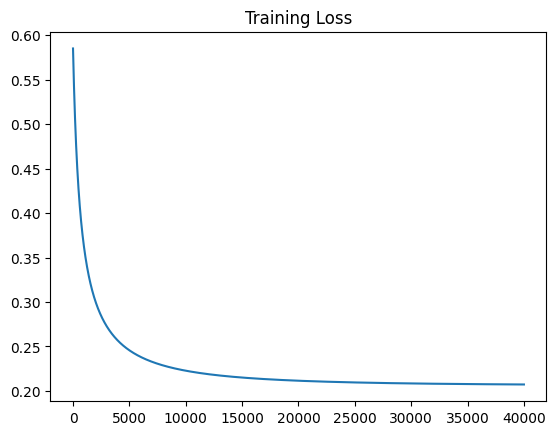

In [19]:
plt.plot(np.arange(0, num_epochs), losses)
plt.title('Training Loss')

The logistic regression model's loss appears to have **stabilized** at around **0.358** after 40,000 epochs. This implies that the gradient descent algorithm used by the model has reached a point of minimal change, indicating little further reduction in loss.

- **Convergence**: From the 22.000nd epoch onwards, the loss values are nearly identical, indicating a state of stabilization.
- **Training Error**: The final training error is **8.1214**, which is quite high. This could mean that there's room for model improvement, potentially through hyperparameter tuning or employing a more sophisticated model.

**First Report:**

Class 0:
- Precision: 0.93
- Recall: 0.98
- F1-Score: 0.96
- Support: 41366

Class 1:
- Precision: 0.72
- Recall: 0.47
- F1-Score: 0.57
- Support: 5301

Overall:
- Accuracy: 0.92
- Macro Avg: 0.83
- Weighted Avg: 0.91

**Second Report:**

Class 0:
- Precision: 0.94
- Recall: 0.97
- F1-Score: 0.96
- Support: 20757

Class 1:
- Precision: 0.70
- Recall: 0.47
- F1-Score: 0.56
- Support: 2576

Overall:
- Accuracy: 0.92
- Macro Avg: 0.82
- Weighted Avg: 0.91

The model's performance seems to be consistent across different datasets, as evidenced by similar precision, recall, f1-score, and accuracy values. However, there are several points that need to be addressed:

1. **Class Imbalance:** Both reports show a significant imbalance in class representation, with Class 0 having much more support than Class 1. This could be affecting the model's ability to accurately classify instances of Class 1.

2. **Performance on Class 1:** The model's performance on Class 1 is noticeably lower than on Class 0, as shown by the lower precision, recall, and f1-score. This suggests that the model may be struggling to correctly predict Class 1, possibly due to the class imbalance.

3. **Overall Performance:** The overall accuracy, macro average, and weighted average are the same for both reports, suggesting a consistent overall performance of the model. However, these metrics can be misleading in cases of class imbalance, so it's important to also consider the precision, recall, and f1-score for each individual class.

In conclusion, while the model's performance is stable, there is room for improvement, particularly in predicting Class 1. Potential solutions could include collecting more data for Class 1, using oversampling or undersampling techniques to address the class imbalance, or experimenting with different models or feature sets.

## References

[1] [Data Normalization Machine Learning, Geeksforgeeks](https://www.geeksforgeeks.org/what-is-data-normalization/)

[2] [Intro2ML, Cy30mk3v - GitHub](https://github.com/Cy30mk3v/Intro2ML/blob/master/Lab03-LogisticRegression.ipynb)